# GSoC Candidate Assessment - Samin

## Task 1: Social Media Data Extraction & Preprocessing (API Handling & Text Cleaning)

### Social Media Data Extraction

Reddit Setup using PRAW

In [2]:
!pip install praw


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 5.0 MB/s eta 0:00:00


In [6]:
import praw
import pandas as pd
import re
from datetime import datetime

REDDIT_CLIENT_ID = 'sY3Gh-yBSsnKm_x_tZykew'
REDDIT_SECRET = 'fIX5fgvQ58DeV5pXKxy6RDWSq9tgXQ'
REDDIT_USER_AGENT = 'GSoC Crisis Monitoring Script'

reddit = praw.Reddit(
    client_id=REDDIT_CLIENT_ID,
    client_secret=REDDIT_SECRET,
    user_agent=REDDIT_USER_AGENT
)

### keyword-based post extraction

In [9]:
keywords = [
    "depressed", "anxiety", "suicidal", "self harm", "overwhelmed", "relapse",
    "addiction help", "mental breakdown", "i want to die", "can't cope",
    "feel empty", "hopeless", "i need help", "worthless", "lonely"
]


In [10]:
subreddits = ["depression", "SuicideWatch", "mentalhealth", "addiction", "offmychest"]

results = []

for sub in subreddits:
    print(f"Searching in r/{sub}...")
    for post in reddit.subreddit(sub).hot(limit=200):
        text = (post.title + " " + post.selftext).lower()
        if any(keyword in text for keyword in keywords):
            results.append({
                "post_id": post.id,
                "timestamp": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                "subreddit": sub,
                "title": post.title,
                "content": post.selftext,
                "score": post.score,
                "num_comments": post.num_comments,
                "url": post.url
            })


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Searching in r/depression...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Searching in r/SuicideWatch...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Searching in r/mentalhealth...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Searching in r/addiction...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Searching in r/offmychest...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [12]:
results[0]

{'post_id': 'doqwow',
 'timestamp': '2019-10-29 14:52:02',
 'subreddit': 'depression',
 'title': 'Our most-broken and least-understood rules is "helpers may not invite private contact as a first resort", so we\'ve made a new wiki to explain it',
 'content': 'We understand that most people who reply immediately to an OP with an invitation to talk privately  mean only to help, but this type of response usually leads to either disappointment or disaster.  it usually works out quite differently here than when you say "PM me anytime" in a casual social context.  \n\nWe have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content - even more so because we know that so many of you are struggling yourselves.  We\'re hard at work behind the scenes on more information and resources to make it easier to give and get quality help here - this is just a small start.  \n\nOur new wiki page explains in detail why i

In [13]:
df = pd.DataFrame(results)

df.to_csv("raw_reddit_posts.csv", index=False)
print(f"Saved {len(df)} posts to raw_reddit_posts.csv")
df.head()


Saved 332 posts to raw_reddit_posts.csv


,post_id,timestamp,subreddit,title,content,score,num_comments,url
0,doqwow,2019-10-29 14:52:02,depression,Our most-broken and least-understood rules is ...,We understand that most people who reply immed...,2366,177,https://www.reddit.com/r/depression/comments/d...
1,1jqw4tf,2025-04-03 22:23:23,depression,If anyone calls me within the next 51 minutes ...,I sent texts. I called. I went for runs. I lov...,76,40,https://www.reddit.com/r/depression/comments/1...
2,1jqyw5o,2025-04-04 00:29:14,depression,Has your depression gotten better over time?,"Feeling hopeless right now honestly, and was w...",34,42,https://www.reddit.com/r/depression/comments/1...
3,1jr4222,2025-04-04 05:04:56,depression,I think I've lost interest in life,I don't know how to really explain it but I'll...,11,1,https://www.reddit.com/r/depression/comments/1...
4,1jqy81k,2025-04-03 23:57:31,depression,Just relapsed on bed rotting,I had broken myself free of a 5 year bed rot a...,15,2,https://www.reddit.com/r/depression/comments/1...


### NLP preprocessing

In [20]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # This is the missing one!
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
df['clean_text'] = df['title'].fillna('') + " " + df['content'].fillna('')
df['clean_text'] = df['clean_text'].apply(clean_text)


In [22]:
df[['subreddit', 'title', 'content', 'clean_text']].head(10)


,subreddit,title,content,clean_text
0,depression,Our most-broken and least-understood rules is ...,We understand that most people who reply immed...,mostbroken leastunderstood rules helpers may i...
1,depression,If anyone calls me within the next 51 minutes ...,I sent texts. I called. I went for runs. I lov...,anyone calls within next minutes wont sent tex...
2,depression,Has your depression gotten better over time?,"Feeling hopeless right now honestly, and was w...",depression gotten better time feeling hopeless...
3,depression,I think I've lost interest in life,I don't know how to really explain it but I'll...,think ive lost interest life dont know really ...
4,depression,Just relapsed on bed rotting,I had broken myself free of a 5 year bed rot a...,relapsed bed rotting broken free year bed rot ...
5,depression,I plan to kill my self once my parents die,"I 15 F have no plan in life I’m worthless, the...",plan kill self parents die f plan life im wort...
6,depression,i’m 16 and i don’t know.,first time ever posting on reddit. i’ll tell y...,im dont know first time ever posting reddit il...
7,depression,Depressed people are the containers for normal...,"idk, roughly that idea, and a pathetic attempt...",depressed people containers normal peoples sad...
8,depression,Is life actually worth of living?,"to be clear, for some people life is 100% wort...",life actually worth living clear people life w...
9,depression,Here's your reminder that nobody actually give...,Nobody cares about what you're going through. ...,heres reminder nobody actually gives af nobody...


In [47]:
df.to_csv("cleaned.csv", index=False)
print(f"Saved {len(df)} posts to cleaned.csv")


Saved 332 posts to cleaned.csv


## Task 2: Sentiment & Crisis Risk Classification (NLP & Text Processing)

### Sentiment Analysis & Risk Classification

In [23]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [24]:
# Define a function to label sentiment
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to cleaned text
df['sentiment'] = df['clean_text'].apply(get_sentiment)
df[['clean_text', 'sentiment']].head()


,clean_text,sentiment
0,mostbroken leastunderstood rules helpers may i...,Positive
1,anyone calls within next minutes wont sent tex...,Positive
2,depression gotten better time feeling hopeless...,Positive
3,think ive lost interest life dont know really ...,Negative
4,relapsed bed rotting broken free year bed rot ...,Negative


In [25]:
df.to_csv("cleaned_and_scored.csv", index=False)


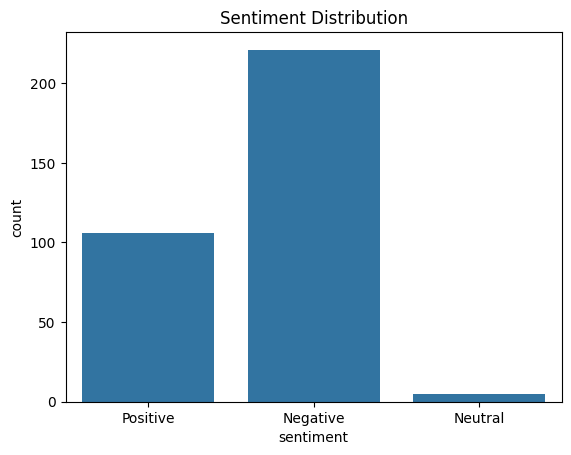

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()


#### BERT for Crisis Term Detection

In [27]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, util
import torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.6/340.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 792.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [28]:
model = SentenceTransformer('all-MiniLM-L6-v2')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [29]:
# Convert the cleaned text into BERT embeddings
post_embeddings = model.encode(df['clean_text'].tolist(), convert_to_tensor=True, show_progress_bar=True)


Batches:   0%|          | 0/11 [00:00<?, ?it/s]

In [30]:
crisis_phrases = [
    "i want to die", "kill myself", "can't go on", "i don’t want to be here anymore",
    "end my life", "taking my life", "overdose", "feel empty", "worthless",
    "need help", "relapse", "nobody cares", "i’m done", "can’t take it anymore"
]

crisis_embeddings = model.encode(crisis_phrases, convert_to_tensor=True)


In [31]:
# Compute cosine similarity for each post against crisis phrases
cosine_scores = util.cos_sim(post_embeddings, crisis_embeddings)

# Get the max similarity to any crisis phrase for each post
df['crisis_score'] = cosine_scores.max(dim=1).values.cpu().numpy()


In [32]:
def classify_risk_bert(row):
    score = row['crisis_score']
    sentiment = row['sentiment']

    if score >= 0.65:
        return 'High-Risk'
    elif score >= 0.35 or sentiment == 'Negative':
        return 'Moderate Concern'
    else:
        return 'Low Concern'

df['risk_level'] = df.apply(classify_risk_bert, axis=1)


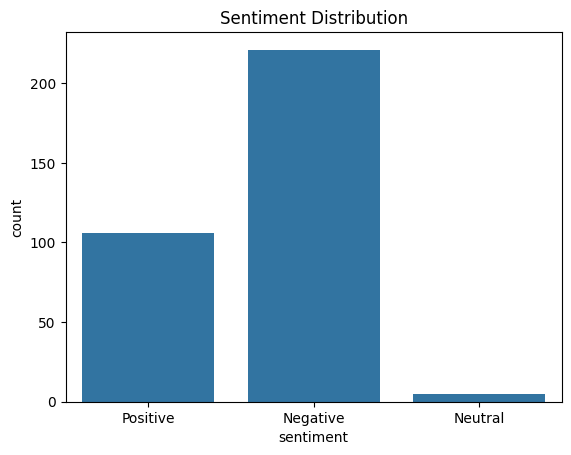

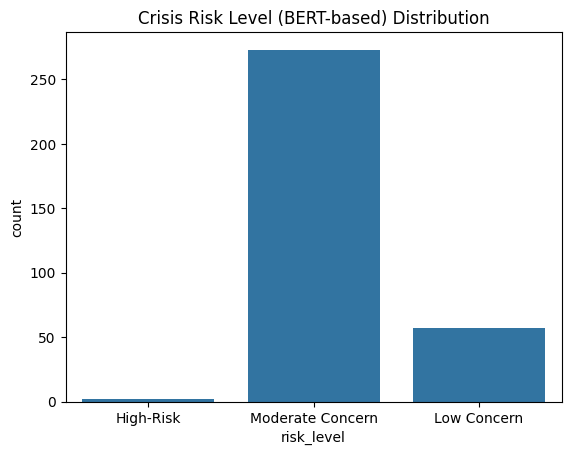

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()

# Risk Levels (with BERT)
sns.countplot(data=df, x='risk_level', order=['High-Risk', 'Moderate Concern', 'Low Concern'])
plt.title('Crisis Risk Level (BERT-based) Distribution')
plt.show()


In [34]:
df[['subreddit', 'sentiment', 'crisis_score', 'risk_level', 'clean_text']].to_csv("reddit_bert_risk_labeled.csv", index=False)
print("Saved enhanced BERT-labeled dataset!")


Saved enhanced BERT-labeled dataset!


## Task 3: Crisis Geolocation & Mapping (Basic Geospatial Analysis & Visualization)

In [35]:
!pip install folium geopy
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import time


### Extract Location Candidates from Text

In [37]:
!pip install -U spacy
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 44.2 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.4
    Uninstalling spacy-3.8.4:
      Successfully uninstalled spacy-3.8.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 68.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [38]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [39]:
def extract_location_spacy(text):
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]  # GPE = Geo-Political Entity
    return locations[0] if locations else None  # Return first match


In [40]:
df['location_guess'] = df['clean_text'].apply(extract_location_spacy)
df['location_guess'].dropna().sample(5)


,location_guess
185,hypochondria
107,california
128,vietnam
175,phobia
84,aloneim


In [41]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="gsoc_crisis_map")

def geocode_location(location):
    try:
        geo = geolocator.geocode(location)
        time.sleep(1)
        if geo:
            return geo.latitude, geo.longitude
    except:
        return None

# Only apply to non-null locations
df['geo'] = df['location_guess'].dropna().apply(geocode_location)
df[['location_guess', 'geo']].dropna().head()


,location_guess,geo
76,australia,"(-24.7761086, 134.755)"
102,korea,"(37.9528488, 126.73311710879327)"
107,california,"(36.7014631, -118.755997)"
128,vietnam,"(15.9266657, 107.9650855)"
134,south africa,"(-28.8166236, 24.991639)"


In [43]:
geo_df = df[df['geo'].notnull()].copy()
geo_df[['lat', 'lon']] = pd.DataFrame(geo_df['geo'].tolist(), index=geo_df.index)


In [44]:
import folium
from folium.plugins import HeatMap

# Initialize map
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Create heatmap from lat/lon
heat_data = geo_df[['lat', 'lon']].values.tolist()
HeatMap(heat_data).add_to(m)

# Save and display
m.save("crisis_heatmap.html")
m


In [45]:
top_locations = df['location_guess'].value_counts().head(5)

print("📍 Top 5 Locations Mentioned in Crisis Posts:\n")
for i, (place, count) in enumerate(top_locations.items(), start=1):
    print(f"{i}. {place} — {count} posts")


📍 Top 5 Locations Mentioned in Crisis Posts:

1. kinda — 3 posts
2. turkey — 2 posts
3. chicago — 2 posts
4. australia — 1 posts
5. aloneim — 1 posts


<ipython-input-46-852ab8c78558>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_locations_df, x='count', y='location', palette='Reds_r')


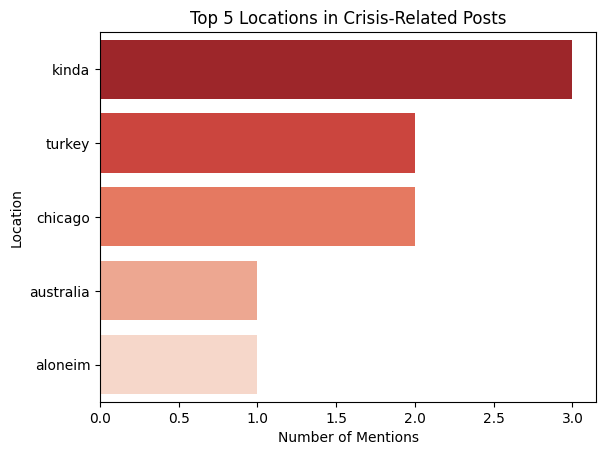

In [46]:
top_locations_df = top_locations.reset_index()
top_locations_df.columns = ['location', 'count']

sns.barplot(data=top_locations_df, x='count', y='location', palette='Reds_r')
plt.title("Top 5 Locations in Crisis-Related Posts")
plt.xlabel("Number of Mentions")
plt.ylabel("Location")
plt.show()
